# Import libraries and datasets

In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
import re 
nltk.download('wordnet')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

In [3]:
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [4]:
train.shape

(4153, 2)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153 entries, 0 to 4152
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  4153 non-null   object
 1   text     4153 non-null   object
dtypes: object(2)
memory usage: 65.0+ KB


In [6]:
train.describe()

,lang_id,text
count,4153,4153
unique,11,4106
top,ven,iinkqubo zeemvavanyo ezijoliswe kubemi bamazwe...
freq,409,3


# Exploratory data analysis

In [7]:
# total number of each obsservation under the train data
train['lang_id'].value_counts()

ven    409
tso    399
afr    398
eng    390
tsn    388
zul    381
nso    375
xho    366
nbl    360
ssw    360
sot    327
Name: lang_id, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


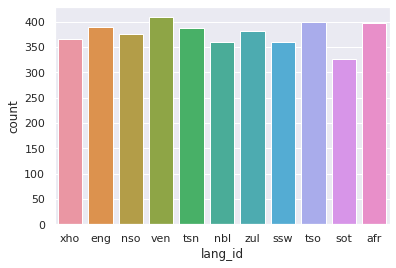

In [8]:
## Plot the Sentiment value count 
sns.countplot(train["lang_id"])

All lang_Id have the same appears. This shows us  that the data is balanced.

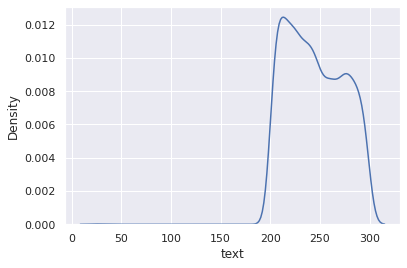

In [9]:
## Lenght of the Text using KDEplot
lenght = train["text"].str.len()
sns.kdeplot(lenght)

This graph shows us that the lenghth of each text is the same

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
## Checking for stopwords
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'any', 'wasn', 'through', 'because', 'll', 'than', 'yours', 'over', "should've", "weren't", 'such', 'the', 'now', 'weren', 'up', 'most', 'these', 'there', 'haven', 'very', 'above', 'am', 'those', 'does', 'how', 'whom', "mustn't", 'before', 'hadn', 'further', 'wouldn', 'too', "aren't", 'some', 'has', 'what', 'few', 'be', 'my', 'by', 'her', 'yourself', 'to', 'have', 'had', 'did', 'against', 'me', 'hers', 'each', 'don', 'a', 't', "wouldn't", 'should', "hasn't", 'your', 'if', "wasn't", 'themselves', "didn't", 'again', 'won', 'we', 'they', 'other', 'why', 'she', 'more', 'd', 'not', "don't", 'in', 'shouldn', 'mightn', 'this', 'didn', 'needn', 'under', 've', 'is', 'couldn', 'but', 'itself', 'off', 'until', 'ourselves', 'ours', "doesn't", 'on', 'was', 'herself', "shouldn't", 'when', "hadn't", 'into', 'myself', 'doing', 'he', 'during', 'theirs', 'own', 'hasn', 'below', 'who', 'm', 'you', "couldn't", 'or', 'about', 'with', 'his', 'were', 'after', 'out', 'then', 'ma', 'i', 'y', 'while', 'that', 

In [13]:
word_list = list()
for i in range(len(train)):
    lip = train.text[i].split()
    for k in lip:
        word_list.append(k)

In [14]:
from collections import Counter 
wordCounter = Counter(word_list)
countedWordDict = dict(wordCounter)
sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)
sortedWordDict[0:20]

[('ya', 3571),
 ('le', 2575),
 ('a', 2572),
 ('ka', 2201),
 ('go', 2085),
 ('e', 1897),
 ('na', 1493),
 ('u', 1331),
 ('die', 1317),
 ('the', 1311),
 ('wa', 1309),
 ('ku', 1123),
 ('o', 1052),
 ('of', 997),
 ('nga', 989),
 ('ba', 983),
 ('ho', 907),
 ('in', 693),
 ('sa', 673),
 ('vha', 665)]

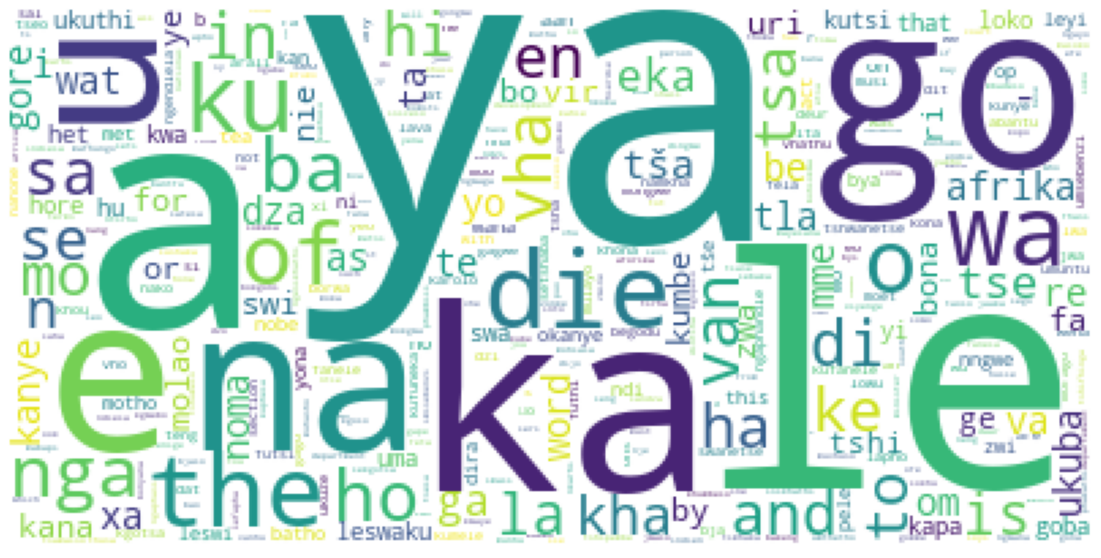

In [16]:
from wordcloud import WordCloud
wordList2 = " ".join(word_list)
stop_word_Cloud = set(stopwords.words("english"))
wordcloud = WordCloud(stopwords=stop_word_Cloud,max_words=2000,background_color="white",min_font_size=3).generate_from_frequencies(countedWordDict)
plt.figure(figsize=[20,10])
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

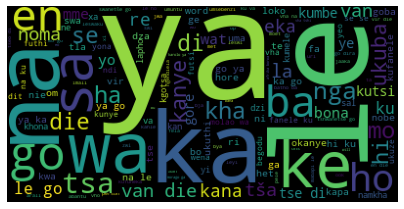

In [17]:
full_text = " ".join(train['text'])

wc = WordCloud(background_color='black')
img = wc.generate(full_text)
plt.figure(figsize=(7,7))
plt.imshow(img)
plt.axis('off')
plt.show()

In [18]:
for text in test['text'][2000:2010]:
    print(text)

mabalane wa khothe ya ndinganyiso' zwi amba mabalane wa khothe ya ndinganyiso o tholiwaho kana o nangiwaho u ya nga khethekanyo 17, yo vhalwaho na khethekanyo 31, yo katela na zwi.
Khethululo zwi songo tea kha u. etshedza dzimbuelo, dzitshomedzo dzine dza tshimbilelana na ndindakhombo.
Komiti ya Tshepetšo: E thuša BOT mo go netefatšeng tshepetšo e botse ya setlamo, bjale ka go kgoboketša ditefelo, ditefelo tša dikgopelo le tlhokomelo ya direkhoto tša leloko. Komiti gape e thuša BOT ka thekišo le kwalakwatšo.
Indlu yowiso-mthetho yephondo ingaphumeza umgaqo-siseko wephondo okanye, apho kufunekayo, ingawutshintsha umgaqo-siseko wayo, ukuba, ubuncinane, isibini kwisithathu samalungu ayo avotela ukuwuvuma uMthetho oYilwayo wokwenjenjalo.
Ngano dza tsiko.
<fn>GOV-ZA.WQFlyer_afr.2010-03-25.af.txt</fn>
Mfuwo, vukhongeri na tindzimi: Vaaki va nga tiphina hi mfuwo wa vona, va landzelela vukhongeri bya vona no tirhisa ririmi ra vona.
Ukubonelela kunye nokukhusela ulimo kwiifama.
Bakeng sa ho tsw

# Cleaning Data

In [19]:
## NlP Processing
ps = PorterStemmer()
lemma = WordNetLemmatizer()
stopwordSet = set(stopwords.words("english"))

In [20]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [21]:
## Clean the text 
text_reviews = list()
t = list()

for i in range(len(train)):
    text = re.sub('[^a-zA-Z]'," ",train['text'][i])
    text = text.lower()
    text = word_tokenize(text,language="english")
    text = [lemma.lemmatize(word) for word in text if(word) not in stopwordSet]
    text = " ".join(text)
    text_reviews.append(text)
    
for i in range(len(test)):
    text = re.sub('[^a-zA-Z]'," ",test['text'][i])
    text = text.lower()
    text = word_tokenize(text,language="english")
    text = [lemma.lemmatize(word) for word in text if(word) not in stopwordSet]
    text = " ".join(text)
    t.append(text)

In [22]:
test_df1 = test.drop('index', axis=1, inplace=False)

#Concatenate both datasets to one for once-through processing/cleaning
df = pd.concat([train, test_df1])
df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [23]:


# Make lower case
print ('Lowering case...')
train['text'] = train['text'].str.lower()

# Remove punctuation
import string
print ('Cleaning punctuation...')
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])
train['text'] = train['text'].apply(remove_punctuation_numbers)

Lowering case...
Cleaning punctuation...


In [24]:
punc_numbers = string.punctuation + '0123456789'

def remove_punctuation(post):
  """This function returns a string item that has no punctuation marks and numbers."""
  punc_numbers = string.punctuation + '0123456789'
  return ''.join([l for l in post if l not in punc_numbers])

In [25]:
df['text'] = df['text'].apply(remove_punctuation)

In [26]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

In [31]:
#tokenizing
tokenizer = TreebankWordTokenizer()

#tokenizing train data
df['text'] = train['text'].apply(tokenizer.tokenize)

In [32]:
#removing stop words
eng_stop = stopwords.words('english')

#removing stop words in data
df['text'] = df['text'].apply(lambda x: ' '.join([item for item in x if item not in eng_stop]))

TypeError: ignored

In [29]:
#Taking a look at the data
df.tail()

,lang_id,text
5677,NaN,NaN
5678,NaN,NaN
5679,NaN,NaN
5680,NaN,NaN
5681,NaN,NaN


In [33]:
#Vectorizing
vector = TfidfVectorizer(min_df=5)

#Vectorizing train data
vector.fit(train['text'])

TfidfVectorizer(min_df=5)

In [34]:
train_tfidf = vector.transform(train['text'])
test_tfidf = vector.transform(test['text'])

In [35]:
display(train_tfidf.shape)
display(test_tfidf.shape)

(4153, 3534)

(5682, 3534)

In [36]:
#Transform vectorized train data to a dataframe
vectorized_train = pd.DataFrame(train_tfidf.todense(), columns=vector.get_feature_names_out())

#Transform vectorized test data to a dataframe
vectorized_test = pd.DataFrame(test_tfidf.todense(), columns=vector.get_feature_names_out())

In [37]:
vectorized_train.head()

,aan,aandag,aangestel,aansoek,aanvaar,aba,abafundi,abamnyama,abantu,abantwana,...,ṅwaliswaho,ṅwana,ṅwedzi,ṋekana,ṋekedza,ṋewa,ṱalutshedza,ṱhanziela,ṱho,ṱo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train Test Split
Split the train_data into training and testing data. This is to make sure that there isn't any leakage of information when we actually fit the test_data that we imported. To avoid overfitting, we are using the train_data to train and test our models.

In [38]:
#Training dataset
train_feat = vectorized_train[:len(train)]
train_target = train['lang_id']

#Test dataset
test_features =  vectorized_test[:len(test):]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(train_feat, 
                                                   train_target, 
                                                   test_size=0.2, 
                                                   random_state=50)

In [40]:
#Splitting you Data for X and Y
X_NB = train['text']
y = train['lang_id']

In [41]:
#vector = TfidfVectorizer(sublinear_tf=True)
vector = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X =vector.fit_transform(X_NB)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model evaluation

# Logistic regression classification
Logistic Regression uses the probability of a data point to belonging to a certain class to classify each datapoint to it's best estimated class

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)

print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Testing accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9993979530403372
Testing accuracy Score :  0.98676293622142
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00        83
         eng       1.00      1.00      1.00        75
         nbl       0.99      0.95      0.97        79
         nso       0.99      1.00      0.99        71
         sot       1.00      1.00      1.00        77
         ssw       0.94      0.99      0.96        67
         tsn       0.99      0.99      0.99        81
         tso       1.00      1.00      1.00        79
         ven       1.00      1.00      1.00        72
         xho       1.00      0.97      0.99        77
         zul       0.94      0.96      0.95        70

    accuracy                           0.99       831
   macro avg       0.99      0.99      0.99       831
weighted avg       0.99      0.99      0.99       831



# Naive Bayes classification
Naive Bayes is a classification algorithm that uses the principle of Bayes theorem to make classifications and assumes independent variables to be statistically independent from each other .

In [44]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)

NB_accuracy = accuracy_score(y_test,NB_prediction)

print("training accuracy Score: ", naiveByes_clf.score(X_train,y_train))
print("Testing accuracy Score : ", NB_accuracy )

print(classification_report(NB_prediction,y_test))

training accuracy Score:  0.9993979530403372
Testing accuracy Score :  0.9963898916967509
              precision    recall  f1-score   support

         afr       1.00      0.99      0.99        84
         eng       1.00      1.00      1.00        75
         nbl       0.99      1.00      0.99        75
         nso       1.00      1.00      1.00        72
         sot       1.00      1.00      1.00        77
         ssw       0.97      1.00      0.99        68
         tsn       1.00      1.00      1.00        81
         tso       1.00      1.00      1.00        79
         ven       1.00      1.00      1.00        72
         xho       1.00      0.99      0.99        76
         zul       1.00      0.99      0.99        72

    accuracy                           1.00       831
   macro avg       1.00      1.00      1.00       831
weighted avg       1.00      1.00      1.00       831



# Random forest classification
Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. As the name suggests, it is a “forest” of trees!

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)

print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Testing accuracy Score : ",rf_accuracy )

print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  1.0
Testing accuracy Score :  0.9711191335740073
              precision    recall  f1-score   support

         afr       1.00      0.99      0.99        84
         eng       1.00      1.00      1.00        75
         nbl       0.92      0.96      0.94        73
         nso       0.97      1.00      0.99        70
         sot       1.00      1.00      1.00        77
         ssw       0.90      0.90      0.90        70
         tsn       0.99      0.98      0.98        82
         tso       1.00      1.00      1.00        79
         ven       1.00      1.00      1.00        72
         xho       0.97      0.94      0.95        78
         zul       0.92      0.92      0.92        71

    accuracy                           0.97       831
   macro avg       0.97      0.97      0.97       831
weighted avg       0.97      0.97      0.97       831



In [46]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              'Random Forest', 'Naive Bayes'],
    'Test accuracy': [ logreg_accuracy, 
              rf_accuracy, NB_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
2,Naive Bayes,0.996390
0,Logistic Regression,0.986763
1,Random Forest,0.971119


# saving model

In [47]:
X_NB_test = test['text']
X_test =vector.transform(X_NB_test)

In [48]:
test_pred = naiveByes_clf.predict(X_test)

test['lang_id'] = test_pred

submission = test[['index','lang_id']]
submission.to_csv('submittedfile.csv', index=False) # writing data to a CSV file


In [49]:
submission

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot
